In [1]:
import matplotlib.pyplot as plt
from matplotlib import pylab
from matplotlib import colors
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
import math
import numpy as np
from numpy.random import default_rng

In [3]:
from sklearn.linear_model import LogisticRegression

# Helper Functions

In [4]:
def sample_ellipse(n, x1_scale=1, x2_scale=1, uniform=False, seed=0):
    rng = default_rng(seed)
    sample = []
    if uniform:
        for _ in range(n):
            rx1 = rng.uniform(low=-x1_scale/2, high=x1_scale/2)
            rx2 = rng.uniform(low=-x2_scale/2, high=x2_scale/2)
            sample.append([rx1, rx2])
    else:
        for _ in range(n):
            rx1 = rng.normal(loc=0, scale=x1_scale)
            rx2 = rng.normal(loc=0, scale=x2_scale)
            sample.append([rx1, rx2])

    return np.asarray(sample)

def rotate_2D(X, angle, in_place=False):
    if in_place:
        X_r = X
    else:
        n, d = X.shape
        X_r = np.zeros((n, d))

    X_r[:, 0] = math.cos(angle)*X[:, 0] - math.sin(angle)*X[:, 1]
    X_r[:, 1]= math.sin(angle)*X[:, 0] + math.cos(angle)*X[:, 1]

    return X_r

def shift_2D(X, dx1, dx2, in_place=False):
    if in_place:
        X_s = X
    else:
        X_s = X.copy()

    X_s[:, 0] += dx1
    X_s[:, 1] += dx2

    return X_s

In [5]:
def generate_data(n, scales, shifts, rot_angle, seeds):
    
    X_0 = sample_ellipse(n, x1_scale=scales[0], x2_scale=scales[1], uniform=False, seed = seeds[0])
    X_0 = rotate_2D(X_0, rot_angle, in_place=True)
    X_0 = shift_2D (X_0, shifts[0][0], shifts[0][1], in_place=True)
    y_0 = np.zeros(n)

    X_1 = sample_ellipse(n, x1_scale=scales[0], x2_scale=scales[1], uniform=False, seed = seeds[1])
    X_1 = rotate_2D(X_1, rot_angle, in_place=True)
    X_1 = shift_2D (X_1, shifts[1][0], shifts[1][1], in_place=True)
    y_1 = np.ones(n)

    X = np.vstack((X_0, X_1))
    y = np.hstack((y_0, y_1))

    return X, y

In [6]:
def set_spines(ax):
    # set the spine locations
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    # turn off the top and right spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.grid(True, which='both')

def plot_data_ax(X, y, ax, markers, colors, **plotargs ):
    for i in range(len(X)):
        ax.plot(X[i][0], X[i][1], marker=markers[int(y[i])], color=colors[int(y[i])], **plotargs)

def plot_data(X, y):
    _, ax = plt.subplots()
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    plot_data_ax(X, y, ax, pmarkers, pcolors, **plotargs)
    set_spines(ax)
    ax.set_ylabel("x2", fontsize=18, loc='top', rotation=0)
    ax.set_xlabel("x1", fontsize=18, loc='right')

def plot_mesh(xx, yy, p, ax):
    ax.pcolormesh(xx, yy, p, cmap=plt.cm.RdBu, shading='nearest', norm=colors.Normalize(0., 1.))

def plot_contour(xx, yy, p, ax, threshold=0.5):
    ax.contour(xx, yy, p, [threshold], linewidths=4., colors='k')

# Logistic Function

In [7]:
def lf(s):   
    return 1./(1 + np.exp(s))

In [8]:
pf = lf
pt = lambda x: 1-pf(x)

In [9]:
ss=np.linspace(-4, 4, 1000)

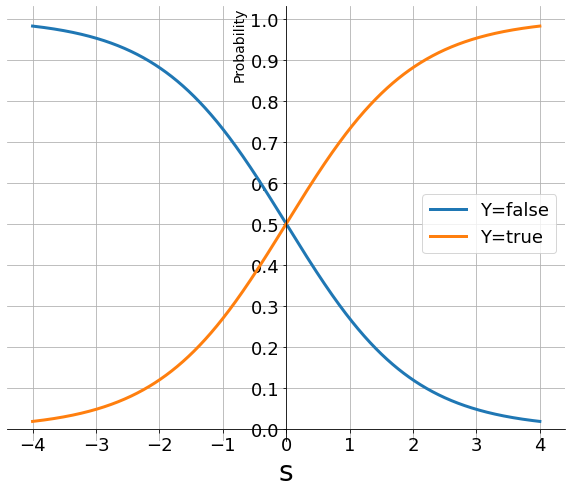

In [10]:
_, ax = plt.subplots()
ax.yaxis.set_ticks(np.arange(0, 1.1, 0.1))

ax.plot(ss, pf(ss), linewidth=3, label='Y=false')
ax.plot(ss, pt(ss), linewidth=3, label='Y=true')
set_spines(ax)

ax.set_ylabel("Probability", fontsize=14, loc='top')
ax.set_xlabel("s", fontsize=28, loc='center')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


ax.legend(loc=0, prop={'size':18})

# Generate Data

In [11]:
X = sample_ellipse(200, x1_scale=1, x2_scale=0.1, uniform=False, seed=0)
X_r = rotate_2D(X, angle=math.pi/4)
X_s = shift_2D(X_r, dx1=3, dx2=-2)

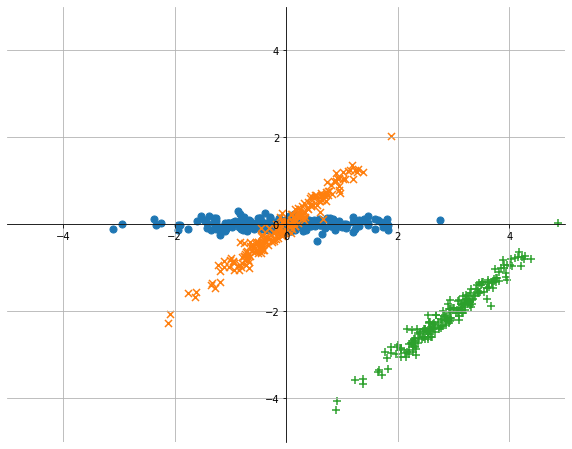

In [12]:
_, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], marker='o', s=50)
ax.scatter(X_r[:, 0], X_r[:, 1], marker='x', s=50)
ax.scatter(X_s[:, 0], X_s[:, 1], marker='+', s=50)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
set_spines(ax)

In [13]:
x1_scale = 1
x2_scale = 0.3

angle = math.pi/4

y0dx1 = 0
y1dx1 = 0

y0dx2 = 1
y1dx2 = -1

In [14]:
X_tr, y_tr = generate_data(50, [x1_scale, x2_scale], [[y0dx1, y0dx2], [y1dx1, y1dx2]], angle, [0, 1])

In [15]:
pmarkers = ['o', 'x']
pcolors = ['r', 'b']
plotargs = {'markersize':10}

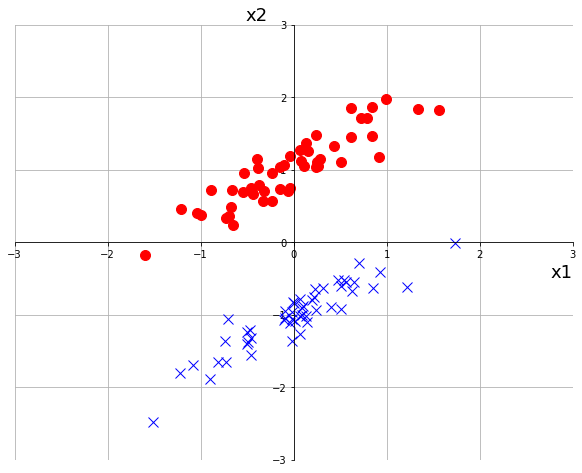

In [16]:
plot_data(X_tr, y_tr)

In [20]:
clf = LogisticRegression(C=0.1, penalty='none', fit_intercept=False)
clf.fit(X_tr, y_tr)

C:\Users\mbilg\miniconda3\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


LogisticRegression(C=0.1, fit_intercept=False, penalty='none')

In [21]:
"{:.2f}".format(clf.intercept_[0])

'0.00'

In [22]:
clf.coef_

array([[  9.30178814, -16.43873884]])

In [23]:
nx1 = nx2 = 200
x1_min = x2_min = -5
x1_max = x2_max = 5
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, nx1), np.linspace(x2_min, x2_max, nx2))
D=np.c_[xx1.ravel(), xx2.ravel()]

In [24]:
p = clf.predict_proba(D)
p = p[:, 1].reshape(xx1.shape)

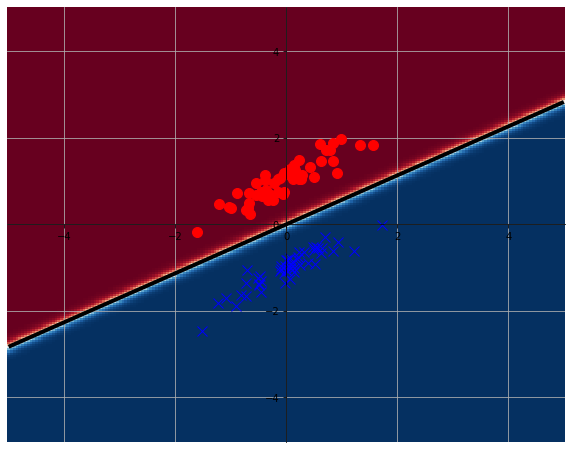

In [25]:
_, ax = plt.subplots()
plot_data_ax(X_tr, y_tr, ax, pmarkers, pcolors, **plotargs)
plot_mesh(xx1, xx2, p, ax)
plot_contour(xx1, xx2, p, ax)
set_spines(ax)

In [26]:
# THE DECISION BOUNDARY

# def f(x1, clf):
#     return -1*(clf.intercept_[0]+clf.coef_[0][0]*x1)/clf.coef_[0][1]

# _, ax = plt.subplots()

# plot_data_ax(X_tr, y_tr, ax, pmarkers, pcolors, **plotargs)

# x1s = range(-3, 4)
# x2s = [f(x1, clf) for x1 in x1s]

# ax.plot(x1s, x2s, linewidth=3, label='clf')

# ax.legend()
# set_spines(ax)

In [27]:
def proby0(x, w1, w2):
    return 1/(1+np.exp(w1*x[0]+w2*x[1]))

In [28]:
def of_log(X, y, w1, w2, lam=0):
    
    ll = 0

    for i in range(X.shape[0]):

        x = X[i]
        s = w1*x[0]+w2*x[1]

        if y[i] == 1:
            ll += s
        
        ll -= np.log(1+np.exp(s))
    
    penalty = w1**2 + w2**2

    return ll - lam*penalty

In [29]:
eps=1e-16
def of_prob(X, y, w1, w2, lam=0):
    
    ll = 0

    for i in range(X.shape[0]):
        p = proby0(X[i], w1, w2)
        p = np.clip(p, a_min=eps, a_max=1-eps)
        if y[i] == 0:
            ll += np.log(p)
        else:
            ll += np.log(1-p)
    
    penalty = w1**2 + w2**2

    return ll - lam*penalty

In [66]:
reg_param = 0.1

In [67]:
nw1 = nw2 = 100
w1_min = w2_min = -8
w1_max = w2_max = 8
ww1, ww2 = np.meshgrid(np.linspace(w1_min, w1_max, nw1), np.linspace(w2_min, w2_max, nw2))
W = np.c_[ww1.ravel(), ww2.ravel()]

ov = []
for w in W:
    ov.append(of_log(X_tr, y_tr, w[0], w[1], lam=reg_param))

In [68]:
i=np.argmax(ov)
max_ov = ov[i]
print(ov[i])
print(W[i])

-3.9997818921806316
[ 2.18181818 -4.60606061]


In [69]:
ov = np.asarray(ov)
ov = ov.reshape(ww1.shape)

Text(1, 0, 'w1')

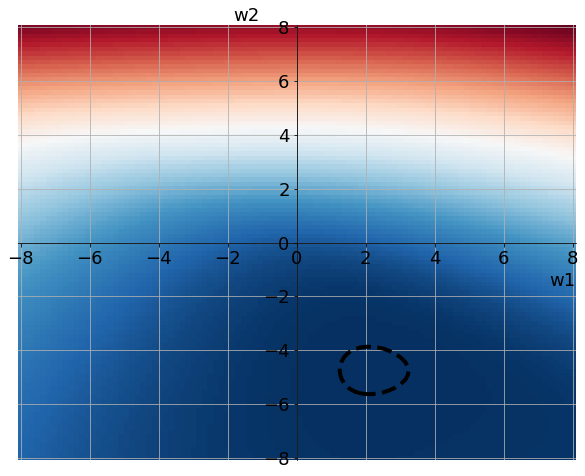

In [70]:
_, ax = plt.subplots()
ax.pcolormesh(ww1, ww2, ov, cmap=plt.cm.RdBu, shading='nearest')#, norm=colors.Normalize(-80, 0.))
plot_contour(ww1, ww2, ov, ax, threshold=max_ov*1.1)
set_spines(ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_ylabel("w2", fontsize=18, loc='top', rotation=0)
ax.set_xlabel("w1", fontsize=18, loc='right')

In [71]:
def gradient(X, y, w1, w2, lam=0):
    
    gs = [0, 0]

    for i in range(X.shape[0]):
        p = proby0(X[i], w1, w2)
        if y[i] == 0:
            gs[0] -= (1-p)*X[i][0]
            gs[1] -= (1-p)*X[i][1]
        else:
            gs[0] += p*X[i][0]
            gs[1] += p*X[i][1]
    
    gs[0] -= lam*2*w1
    gs[1] -= lam*2*w2

    return gs

In [72]:
gradient(X_tr, y_tr, 1, -4, 1)

[-0.23362540169965307, 6.210543458187634]

In [73]:
nw1 = nw2 = 100
w1_min = w2_min = -8
w1_max = w2_max = 8
ww1, ww2 = np.meshgrid(np.linspace(w1_min, w1_max, nw1), np.linspace(w2_min, w2_max, nw2))
W = np.c_[ww1.ravel(), ww2.ravel()]

gs = [[], []]
for w in W:
    _gs = gradient(X_tr, y_tr, w[0], w[1], lam=reg_param)
    gs[0].append(_gs[0])
    gs[1].append(_gs[1])

In [74]:
np.max(gs[0])

26.278666850257192

In [75]:
np.min(gs[0])

-23.16232954186329

In [76]:
np.max(gs[1])

1.5488667877715734

In [77]:
np.min(gs[1])

-102.58895335483373

In [78]:
w1g = np.asarray(gs[0])
w2g = np.asarray(gs[1])
w1g = w1g.reshape(ww1.shape)
w2g = w2g.reshape(ww1.shape)

Text(1, 0, 'w1')

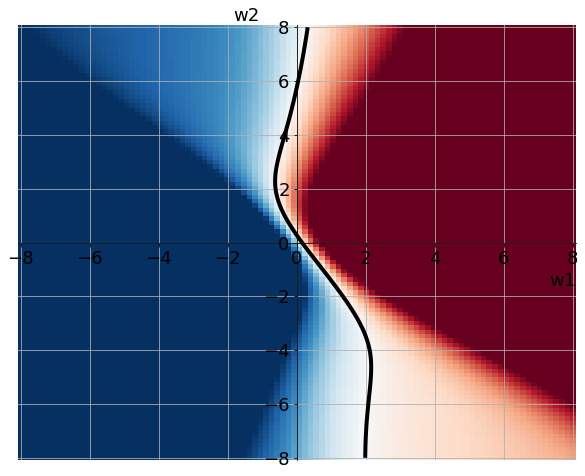

In [79]:
fig, ax = plt.subplots()
ax.pcolormesh(ww1, ww2, w1g, cmap=plt.cm.RdBu, shading='nearest', norm=colors.Normalize(-5, 5))
plot_contour(ww1, ww2, w1g, ax, threshold=0)
set_spines(ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_ylabel("w2", fontsize=18, loc='top', rotation=0)
ax.set_xlabel("w1", fontsize=18, loc='right')

Text(1, 0, 'w1')

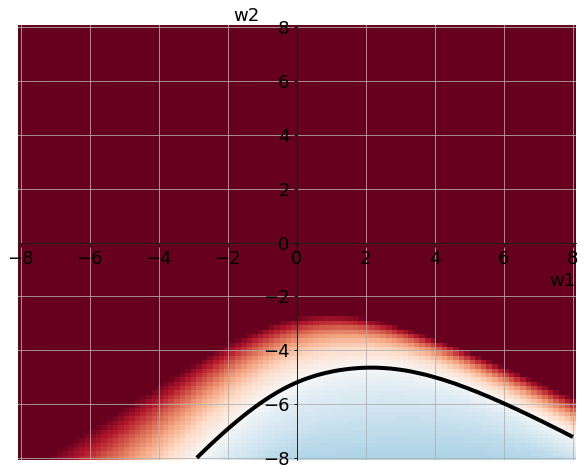

In [80]:
fig, ax = plt.subplots()
ax.pcolormesh(ww1, ww2, w2g, cmap=plt.cm.RdBu, shading='nearest', norm=colors.Normalize(-5, 5))
plot_contour(ww1, ww2, w2g, ax, threshold=0)
set_spines(ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_ylabel("w2", fontsize=18, loc='top', rotation=0)
ax.set_xlabel("w1", fontsize=18, loc='right')

Text(1, 0, 'w1')

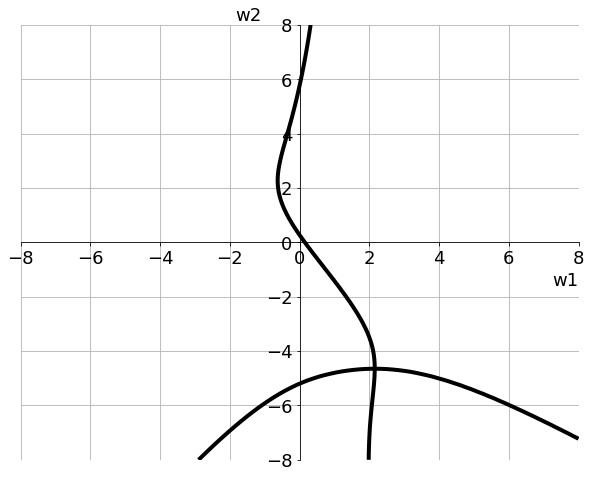

In [81]:
fig, ax = plt.subplots()
plot_contour(ww1, ww2, w1g, ax, threshold=0)
plot_contour(ww1, ww2, w2g, ax, threshold=0)
set_spines(ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_ylabel("w2", fontsize=18, loc='top', rotation=0)
ax.set_xlabel("w1", fontsize=18, loc='right')

In [82]:
w1 = 4
w2 = 5
w1s = [w1]
w2s = [w2]

ovs = [of_log(X_tr, y_tr, w1, w2, lam=reg_param)]

max_iter = 100
learning_rate = 0.01
for _ in range(max_iter):
    g = gradient(X_tr, y_tr, w1, w2, lam=reg_param)

    w1 = w1 + learning_rate*g[0]
    w2 = w2 + learning_rate*g[1]

    w1s.append(w1)
    w2s.append(w2)
    ovs.append(of_log(X_tr, y_tr, w1, w2, lam=reg_param))

Text(1, 0, 'w1')

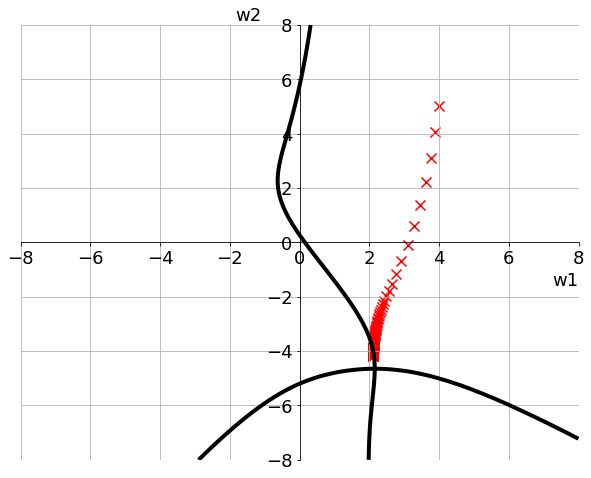

In [83]:
fig, ax = plt.subplots()
plot_contour(ww1, ww2, w1g, ax, threshold=0)
plot_contour(ww1, ww2, w2g, ax, threshold=0)
ax.scatter(w1s, w2s, marker='x', s=100, c='r')
set_spines(ax)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_ylabel("w2", fontsize=18, loc='top', rotation=0)
ax.set_xlabel("w1", fontsize=18, loc='right')

Text(0.5, 0, 'Iterations')

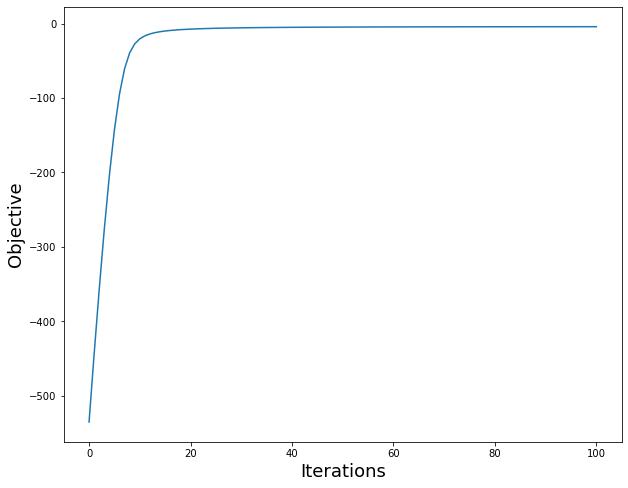

In [84]:
fig, ax = plt.subplots()
ax.plot(range(len(ovs)), ovs)
ax.set_ylabel("Objective", fontsize=18, loc='center')
ax.set_xlabel("Iterations", fontsize=18, loc='center')
#set_spines(ax)